# Logistic Regression
Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a categorical variable, where there are only two possible outcomes. The goal of logistic regression is to find the best fitting model to describe the relationship between the categorical (0's,1's) characteristic of interest, and a set of independent variables. [Reference](https://bradzzz.gitbooks.io/ga-seattle-dsi/content/dsi/dsi_04_logistic_regression_stats/2.1-lesson/readme.html). Logistic Function :

**Input**: Independent variable (X)

**Parameters**: Weight and bias. 

**Outpu**t: Dependent variable (Y)

**Activation Function**: calculates the weighted sum of its inputs, adds a bias and decides whether it should be label 0 or 1.

$$ σ = \frac{1}{1 + e^-x}\sum_{i=1}^{m}  $$
$$ sigmoid calculation = σ(W^T * X + b)$$

**Loss Function:** measures how well the output of the model agrees with the ground truth labels(Y) in the training data and finds a set of parameters that reduce the value of the loss function.

$$ cost= - \frac{1}{m}\sum_{i=1}^{m}[y*log(a)+(1-y)* log(1-a)]$$

**Gradient Descent** :Used to minimize the cost function and the parameters (W,b).

$$ dW = - \frac{\partial Cost}{\partial W} = (A - Y)* X^T.... shape(1Xn)$$
$$ dW = - \frac{\partial Cost}{\partial B} = (A - Y) $$
$$ W = W - a * dW^T $$
$$ B = B - a * dB $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = np.ones((20,1))# biased data to add to x
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])
X=np.concatenate((c,X),axis=1)#adds biased term to the test set

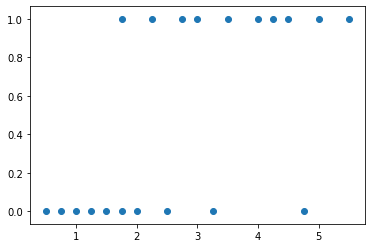

In [3]:
plt.scatter(X[:,1],y)

In [4]:
#splits our data into tthetao sets (a training and testing set)
#split : 80% train and 20% test
train_index = int(0.6 * len(X))
X_train, X_test = X[:train_index], X[train_index:] 
y_train, y_test = y[:train_index], y[train_index:]

print("X_train: " ,X_train.shape, "\n")
print("y_train: " ,y_train.shape, "\n")
print("X_test: " ,X_test.shape, "\n")
print("y_test: " ,y_test.shape)

X_train:  (12, 2) 

y_train:  (12,) 

X_test:  (8, 2) 

y_test:  (8,)


In [5]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, X_train.shape[1])
y_test = y_test.reshape(1, X_test.shape[1])

print("X_train: " ,X_train.shape, "\n")
print("y_train: " ,y_train.shape, "\n")
print("X_test: " ,X_test.shape, "\n")
print("y_test: " ,y_test.shape)

X_train:  (2, 12) 

y_train:  (1, 12) 

X_test:  (2, 8) 

y_test:  (1, 8)


In [6]:
#The activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [7]:
def model(X, Y, learning_rate, epochs):
    
    m = X_train.shape[1] #the total number of training examples
    n = X_train.shape[0] #the total number of features
    
    # initializing the parameters
    weight = np.zeros((n,1))
    bias = 0
    
    cost_list = []
    
    for i in range(epochs):
         # calculate the parameters and wrap the sigmoid function over it.
        Z = np.dot(weight.T, X) +bias
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Update weights and bias with Gradient Descent till cost is minimized
        dw = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        weight = weight - learning_rate*dw.T
        bias =bias - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(epochs/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
     #return updated weights and cost history   
    return weight,bias, cost_list

In [8]:
iterations = 100000
learning_rate = 0.0005
weight, bias, cost_list = model(X_train, y_train, learning_rate = learning_rate, epochs = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.5434105964638803
cost after  20000 iteration is :  0.5052934954650505
cost after  30000 iteration is :  0.4899817400311043
cost after  40000 iteration is :  0.48321348939897246
cost after  50000 iteration is :  0.48001858639447714
cost after  60000 iteration is :  0.4784415237503222
cost after  70000 iteration is :  0.4776386702547404
cost after  80000 iteration is :  0.47722101305731757
cost after  90000 iteration is :  0.47700037262595074


## Prediction

In [9]:
def accuracy(X, Y, weight,bias):
    
    Z = np.dot(weight.T, X) + bias
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [10]:
accuracy(X_test, y_test, weight, bias)

Accuracy of the model is :  50.0 %


# Report
To find out whether or not a relationship between two variables exists, I plot the given data X and Y in a scatter diagram. In the diagram, the points show a curve line which is a regression curve. From this observation, it was evident that the best model for this data is logistic regression. The dataset is split into train and test set. The train set is used to train the model, and the test set is used to check the accuracy of the model. In the logistic function, I first initialised the parameters (weight and bias )with 0's, then train it in a way that makes accurate predictions. 
The predictions are made with the sigmoid function:

$$ σ(W^T * X + b)$$


*This function multiplies the parameters with the input and the applying then applied the sigmoid function.*

Because sigmoid values are only 0 and 1, whenever the values of the prediction are bigger than 0.5, it's label as 1, otherwise 0. At the beginning of the cost function, there was a high error and to minimised I used gradient descent. The gradient descent updates the weight to a minimum value and the loss function decreases.
I adjusted the learning rate a few times to improve the performance of the model. I started with a high learning rate and gradually lowered it until I got the best steep decrease in the loss function.

# 1. After how many iterations, and for which learning rate (α) did your algorithm converge? Plot the loss function with respect to iterations to illustrate this point.

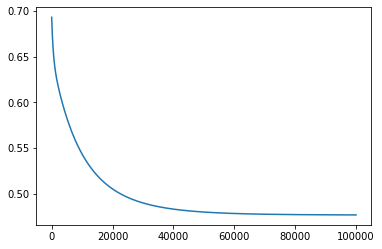

In [11]:
plt.plot(cost_list)

# 2.What happens if α is too large? How does this affect the loss function? Plot the loss function with respect to iterations to illustrate this point.

cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.6385009804307771
cost after  20000 iteration is :  0.6385009804307771
cost after  30000 iteration is :  0.6385009804307771
cost after  40000 iteration is :  0.6385009804307771
cost after  50000 iteration is :  0.6385009804307771
cost after  60000 iteration is :  0.6385009804307771
cost after  70000 iteration is :  0.6385009804307771
cost after  80000 iteration is :  0.6385009804307771
cost after  90000 iteration is :  0.6385009804307771


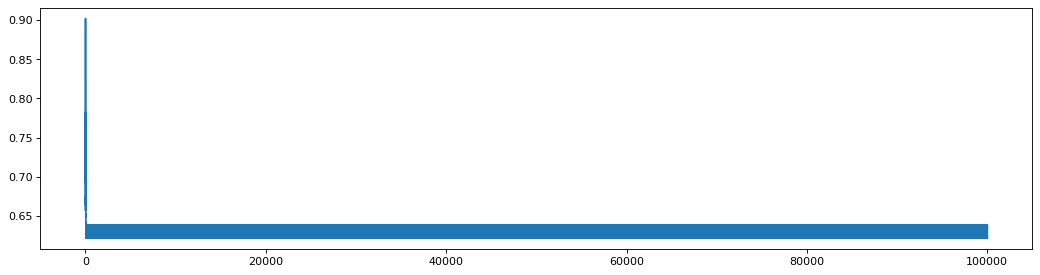

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
# Number of iterations
num_its = 300

# Trying out different learning rates and plotting


iterations = 100000
learning_rate = 1.5
weight, bias, cost_list = model(X_train, y_train, learning_rate = learning_rate, epochs = iterations)
plt.plot(cost_list)


Setting up the learning rate higher causes drastic updates which lead to divergent behaviours. The weight changes are so big that the optimizer overshoots the minimum and make the loss worse.




# 3.Assume that you are applying logistic regression to the iris (flower) dataset, as in the previous assignment. Answer the following questions:

**(a) How would your hypothesis function change in this case and why?**

The only thing that would change is the n (number of features) as the iris dataset contains 3 classes and each of those classes refers to a type of iris plant.

 
**(b) How would you utilize your implementation of logistic regression in order to perform (multi-class) classification on the iris dataset? Include some pseudocode while discussing your approach.**


The above model is for binary classification and it can be extended to multi-class classification. The strategy I would use is one vs all classification, where we would divide the data sets such that a hypothesis separates one class label from all the rest.
